In [4]:
twmAccounts=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_accounts.csv',sep=';')
twmCheckingAcct=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_checking_acct.csv',sep=';')
twmCheckingTran=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_checking_tran.csv',sep=';')
twmCreditAcc=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_credit_acct.csv',sep=';')
twmCreditTran=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_credit_tran.csv',sep=';')
twmCustomer=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_customer.csv',sep=';')
twmSavingsAcct=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_savings_acct.csv',sep=';')
twmSavingsTran=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_savings_tran.csv',sep=';')
twmTrans=pd.read_csv('/Users/jacklobe/lighthouse/w4/mini-project-III/twm_transactions.csv',sep=';')

In [56]:
#imports only 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import plotly.express as px
from scipy import stats
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")

In [6]:
for row in twmTrans.head().iterrows():
    print(row[1])
    

tran_id                  27
acct_nbr           13625623
tran_amt                  0
principal_amt             0
interest_amt              0
new_balance         3753.34
tran_date        21.10.1995
tran_time            121656
channel                  A 
tran_code              IQ  
Name: 0, dtype: object
tran_id                97
acct_nbr         13628392
tran_amt                0
principal_amt           0
interest_amt            0
new_balance        254.49
tran_date        5.2.1995
tran_time          153053
channel                V 
tran_code            IQ  
Name: 1, dtype: object
tran_id                 21
acct_nbr          13630842
tran_amt            -97.57
principal_amt       -97.57
interest_amt             0
new_balance        3819.56
tran_date        23.7.1995
tran_time                0
channel                 P 
tran_code             WD  
Name: 2, dtype: object
tran_id                 44
acct_nbr          13631412
tran_amt             -0.15
principal_amt        -0.15
interest_amt 

twmCheckingAcct

# mini-project-III

twm_customer - information about customers
twm_accounts - information about accounts
twm_checking_accounts - information about checking accounts (subset of twm_accounts)
twm_credit_accounts - information about checking accounts (subset of twm_accounts)
twm_savings_accounts - information about checking accounts (subset of twm_accounts)
twm_transactions - information about financial transactions
twm_savings_tran - information about savings transactions (subset of twm_transactions)
twm_checking_tran - information about savings transactions (subset of twm_transactions)
twm_credit_tran - information about credit checking (subset of twm_transactions)

# Output
In this miniproject, we will:

## Create two separate customer segmentations (using clustering) to split them into 3-5 clusters:
## 1)based on demographics (only on the information from twm_customer)
## 2)based on their banking behavior. We can take following things into consideration as banking behavior:
###     a)do they have savings account? How much do they save?
###     b)do they have credit account? How much do they live in debt?
###     c)are they making lot of small transactions or few huge ones?

## visualize the created clusters using radar charts and compare them agains each other

## visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.

## visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).

In [7]:
twmCustomer#general information about customer and general demographics 
#get rid of name, who they are makes no difference to the model 

cust_id  income  age  years_with_bank  nbr_children gender  \
0    1362691   26150   46                5             1     M    
1    1362487    6605   71                1             0     M    
2    1363160   18548   38                8             0     F    
3    1362752   47668   54                3             0     F    
4    1362548   44554   59                9             2     F    
..       ...     ...  ...              ...           ...    ...   
742  1363324   14795   36                6             1     F    
743  1362895   26387   56                6             1     M    
744  1362569   61300   50                0             2     M    
745  1363364   15100   37                7             0     F    
746  1363303   17875   18                3             0     F    

     marital_status name_prefix  \
0                 2               
1                 2               
2                 1               
3                 1               
4                 4               
..              ...         ...   
742               4               
743               2               
744               2               
745               2               
746               1               

                                            first_name  \
0    Donald                                        ...   
1    ChingDyi                                      ...   
2    Rosa                                          ...   
3    Lisa                                          ...   
4    Barbara                                       ...   
..                                                 ...   
742  Lillian                                       ...   
743  Marty                                         ...   
744  Ken                                           ...   
745  Debbie                                        ...   
746  Molly                                         ...   

                                             last_name  street_nbr  \
0    Marek                                         ...        8298   
1    Moussavi                                      ...       10603   
2    Johnston                                      ...        8817   
3    Martin                                        ...         676   
4    O'Malley                                      ...        6578   
..                                                 ...         ...   
742  Kaufman                                       ...        9677   
743  McSherry                                      ...        3227   
744  Lawrence                                      ...        6082   
745  Runner                                        ...        7851   
746  Potter                                        ...        7824   

                                           street_name  postal_code  \
0    Second                                        ...        89194   
1    Daffodil                                      ...        90159   
2    Figueroa                                      ...        90024   
3    Humble                                        ...        90172   
4    C                                             ...        10138   
..                                                 ...          ...   
742  B                                             ...        90016   
743  Inspiration                                   ...        10126   
744  23rd                                          ...        87194   
745  H                                             ...        35241   
746  E                                             ...        90029   

                                    city_name state_code  
0    Las Vegas                                      NV    
1    Los Angeles                                    CA    
2    Los Angeles                                    CA    
3    Los Angeles                                    CA    
4    New York City                                  NY    
..                                

## Data Exploration

In [8]:
twmCheckingAcct#checking account info with balance and start and end date 

cust_id  acct_nbr  minimum_balance  per_check_fee account_active  \
0    1362548  13625482             3000           0.00             Y    
1    1362487  13624872             3000           0.00             Y    
2    1363017  13630172             3000           0.00             Y    
3    1362752  13627522              100           0.15             Y    
4    1363282  13632822              100           0.15             Y    
..       ...       ...              ...            ...            ...   
515  1363467  13634672             3000           0.00             Y    
516  1362855  13628552              200           0.15             Y    
517  1363324  13633242             3000           0.00             Y    
518  1362569  13625692              200           0.15             Y    
519  1363303  13633032             3000           0.00             Y    

    acct_start_date acct_end_date  starting_balance  ending_balance  
0        11.11.1986           NaN           6004.34          569.65  
1         12.1.1995           NaN           2781.07         1401.21  
2         19.3.1994           NaN           2694.91          147.15  
3          8.1.1994           NaN            487.69            3.76  
4          5.3.1988           NaN            133.90           84.18  
..              ...           ...               ...             ...  
515       15.1.1995           NaN           4155.98           58.47  
516        2.9.1994           NaN            202.30         1070.87  
517       25.8.1994           NaN           4010.41         2325.37  
518        6.4.1995           NaN            927.07           46.48  
519       18.2.1995           NaN           2789.57           39.22  

[520 rows x 9 columns]

In [9]:
twmCheckingTran#list of transactions based on sutomer id 

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363481       26     -0.15          -0.15           0.0        58.99   
1      1362784       90   -200.00        -200.00           0.0      1380.69   
2      1363088       46      0.00           0.00           0.0       128.35   
3      1363306       32    -40.32         -40.32           0.0       433.06   
4      1363251       11    -87.88         -87.88           0.0      1919.55   
...        ...      ...       ...            ...           ...          ...   
46199  1363272       50     -0.15          -0.15           0.0       319.71   
46200  1363393       61   -102.52        -102.52           0.0        57.47   
46201  1363365       25   -275.89        -275.89           0.0      2632.93   
46202  1363031       73     -0.15          -0.15           0.0      1103.47   
46203  1363011        6   1261.26        1261.26           0.0     13654.61   

       tran_date     tran_time channel tran_code  
0      29.1.1995                            FK    
1       2.7.1995         53313      A       WD    
2      26.3.1995           834      A       IQ    
3      29.1.1995                    P       WD    
4       8.2.1995                    P       WD    
...          ...           ...     ...       ...  
46199  3.10.1995                            FK    
46200  22.1.1995                    P       WD    
46201   8.1.1995                    P       WD    
46202  23.1.1995                            FK    
46203   7.1.1995         94214      B       DP    

[46204 rows x 10 columns]

In [10]:
twmCreditAcc#credit card account info 
#is ending balance going to be debt?? yes 

cust_id          acct_nbr  credit_limit  credit_rating account_active  \
0    1363160  4561143213631600          1000              0             Y    
1    1362487  4561143213624870          3000              0             Y    
2    1362548  4561143213625480          6700              0             Y    
3    1362752  4561143213627520          2400              0             N    
4    1363017  4561143213630170          1000              0             Y    
..       ...               ...           ...            ...            ...   
463  1363364  4561143213633640          3000              0             N    
464  1363467  4561143213634670          1500              0             Y    
465  1363263  4561143213632630          3000              0             Y    
466  1362569  4561143213625690          9200              0             Y    
467  1363303  4561143213633030          1000              0             Y    

    acct_start_date acct_end_date  starting_balance  ending_balance  
0        12.10.1988           NaN            657.46          286.69  
1          8.8.1995           NaN              0.00         1548.23  
2        11.11.1986           NaN           6965.25           68.68  
3         9.10.1994      2.4.1995           2302.14            0.00  
4          8.2.1995           NaN              0.00         1000.00  
..              ...           ...               ...             ...  
463      23.11.1989     23.7.1995           1783.86         1785.97  
464       30.6.1993           NaN           1193.89         1500.00  
465       29.3.1995           NaN              0.00         1218.94  
466       6.12.1995           NaN              0.00         9200.00  
467       22.4.1995           NaN              0.00         1000.00  

[468 rows x 9 columns]

In [11]:
twmCreditTran#general transactions 

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363088       46   -121.49        -121.49           0.0      -141.00   
1      1363306       32   -220.64        -220.64           0.0      -520.13   
2      1362959       10      0.00           0.00           0.0     -3900.00   
3      1363429       13   -195.27        -195.27           0.0     -1739.74   
4      1363393       14    -37.32         -37.32           0.0      -198.98   
...        ...      ...       ...            ...           ...          ...   
20162  1363002       60    -94.52         -94.52           0.0     -3733.22   
20163  1362995       36      0.00           0.00           0.0     -2300.00   
20164  1363196       39   -100.00        -100.00           0.0      -289.91   
20165  1363393       61    -63.04         -63.04           0.0      -736.70   
20166  1363011        6      0.00           0.00           0.0     -1612.91   

        tran_date tran_time channel tran_code  
0      20.10.1995    101144      E       CG    
1      13.10.1995     83115      E       CG    
2       26.2.1995     84129      K       IQ    
3        3.1.1995    191815      E       CG    
4        4.7.1995    100811      E       CG    
...           ...       ...     ...       ...  
20162   20.5.1995    224723      E       CG    
20163   28.9.1995    142011      B       IQ    
20164   12.5.1995    152852      A       CA    
20165  16.10.1995    145535      E       CG    
20166    2.2.1995     51628      C       IQ    

[20167 rows x 10 columns]

In [12]:
twmSavingsAcct#savings account based on customer id 

cust_id  acct_nbr  minimum_balance acct_type account_active  \
0    1363160  13631603              100      BS               Y    
1    1362487  13624873              500      MM               N    
2    1362548  13625483              100      BS               Y    
3    1362752  13627523              100      BS               Y    
4    1363017  13630173              100      BS               N    
..       ...       ...              ...       ...            ...   
416  1363141  13631413              100      BS               Y    
417  1363038  13630383              100      BS               Y    
418  1362529  13625293              100      BS               Y    
419  1362895  13628953              100      BS               Y    
420  1362855  13628553              100      BS               Y    

    acct_start_date acct_end_date  starting_balance  ending_balance  
0          9.5.1988           NaN            113.04          122.54  
1         27.6.1994     25.8.1995            651.73           12.89  
2        11.11.1986           NaN            250.24          254.02  
3         20.2.1995           NaN            600.26          609.33  
4         27.4.1994    31.10.1995           2011.02         2901.35  
..              ...           ...               ...             ...  
416      11.11.1994           NaN            177.33          528.57  
417       20.2.1995           NaN            333.53          508.26  
418      15.11.1992           NaN            662.06          873.14  
419       27.6.1995           NaN            169.96           96.25  
420       21.3.1995           NaN            167.71          161.04  

[421 rows x 9 columns]

In [13]:
twmSavingsTran

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363481       26    136.03         136.03          0.00      1521.57   
1      1362746        1      2.83           0.00          2.83      2265.90   
2      1363251       11     13.56           0.00         13.56      5438.90   
3      1362542        4      0.76           0.00          0.76       610.92   
4      1363387       11    148.69         148.69          0.00       470.05   
...        ...      ...       ...            ...           ...          ...   
11184  1362950       10      1.68           0.00          1.68       674.90   
11185  1362721       14      0.02           0.00          0.02        13.82   
11186  1362806        4      3.60           0.00          3.60      1444.57   
11187  1362995       36    541.91         541.91          0.00      4326.98   
11188  1363011        6      2.87           0.00          2.87      2297.91   

        tran_date tran_time channel tran_code  
0      26.10.1995     84111      A       DP    
1       31.1.1995    235959              IN    
2       30.4.1995    235959              IN    
3       30.4.1995    235959              IN    
4       21.5.1995    144736      E       DP    
...           ...       ...     ...       ...  
11184  31.10.1995    235959              IN    
11185   30.9.1995    235959              IN    
11186   30.4.1995    235959              IN    
11187   24.9.1995    150959      E       DP    
11188   31.3.1995    235959              IN    

[11189 rows x 10 columns]

In [14]:
twmTrans#general trans tagged off of acct_nbr 

tran_id          acct_nbr  tran_amt  principal_amt  interest_amt  \
0           27          13625623      0.00           0.00           0.0   
1           97          13628392      0.00           0.00           0.0   
2           21          13630842    -97.57         -97.57           0.0   
3           44          13631412     -0.15          -0.15           0.0   
4           31          13625722      0.00           0.00           0.0   
...        ...               ...       ...            ...           ...   
77575       77          13631752    -95.71         -95.71           0.0   
77576       94          13626772    -93.90         -93.90           0.0   
77577       42          13625262    -10.35         -10.35           0.0   
77578       98          13627052   -423.80        -423.80           0.0   
77579       57  4561143213632570      0.00           0.00           0.0   

       new_balance   tran_date  tran_time channel tran_code  
0          3753.34  21.10.1995     121656      A       IQ    
1           254.49    5.2.1995     153053      V       IQ    
2          3819.56   23.7.1995          0      P       WD    
3           224.05   30.1.1995          0              FK    
4           240.55   25.1.1995     204521      B       IQ    
...            ...         ...        ...     ...       ...  
77575        95.71   14.2.1995     161001      A       TR    
77576       824.36   11.3.1995          0      P       WD    
77577        10.36   26.8.1995          0      P       WD    
77578       162.28   13.6.1995     110209      E       WD    
77579     -2420.91  18.10.1995     104027      A       IQ    

[77580 rows x 10 columns]

# Data prep for demographics 
   ## Using only info from twmCustomer 
   

In [15]:
twmCustomer

cust_id  income  age  years_with_bank  nbr_children gender  \
0    1362691   26150   46                5             1     M    
1    1362487    6605   71                1             0     M    
2    1363160   18548   38                8             0     F    
3    1362752   47668   54                3             0     F    
4    1362548   44554   59                9             2     F    
..       ...     ...  ...              ...           ...    ...   
742  1363324   14795   36                6             1     F    
743  1362895   26387   56                6             1     M    
744  1362569   61300   50                0             2     M    
745  1363364   15100   37                7             0     F    
746  1363303   17875   18                3             0     F    

     marital_status name_prefix  \
0                 2               
1                 2               
2                 1               
3                 1               
4                 4               
..              ...         ...   
742               4               
743               2               
744               2               
745               2               
746               1               

                                            first_name  \
0    Donald                                        ...   
1    ChingDyi                                      ...   
2    Rosa                                          ...   
3    Lisa                                          ...   
4    Barbara                                       ...   
..                                                 ...   
742  Lillian                                       ...   
743  Marty                                         ...   
744  Ken                                           ...   
745  Debbie                                        ...   
746  Molly                                         ...   

                                             last_name  street_nbr  \
0    Marek                                         ...        8298   
1    Moussavi                                      ...       10603   
2    Johnston                                      ...        8817   
3    Martin                                        ...         676   
4    O'Malley                                      ...        6578   
..                                                 ...         ...   
742  Kaufman                                       ...        9677   
743  McSherry                                      ...        3227   
744  Lawrence                                      ...        6082   
745  Runner                                        ...        7851   
746  Potter                                        ...        7824   

                                           street_name  postal_code  \
0    Second                                        ...        89194   
1    Daffodil                                      ...        90159   
2    Figueroa                                      ...        90024   
3    Humble                                        ...        90172   
4    C                                             ...        10138   
..                                                 ...          ...   
742  B                                             ...        90016   
743  Inspiration                                   ...        10126   
744  23rd                                          ...        87194   
745  H                                             ...        35241   
746  E                                             ...        90029   

                                    city_name state_code  
0    Las Vegas                                      NV    
1    Los Angeles                                    CA    
2    Los Angeles                                    CA    
3    Los Angeles                                    CA    
4    New York City                                  NY    
..                                

In [16]:
import us
states=twmCustomer.state_code
nowthis=states.unique()
estados=nowthis.tolist()

In [17]:
from pandas_profiling import ProfileReport 
prof = ProfileReport(twmCustomer) 
prof.to_file(output_file='customer_demo.html')

In [18]:
twmCustomer.dtypes
#name doesnt matter
#gender needs to be int
#rid of street name and number
#keep postal 
#rid state_code??

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

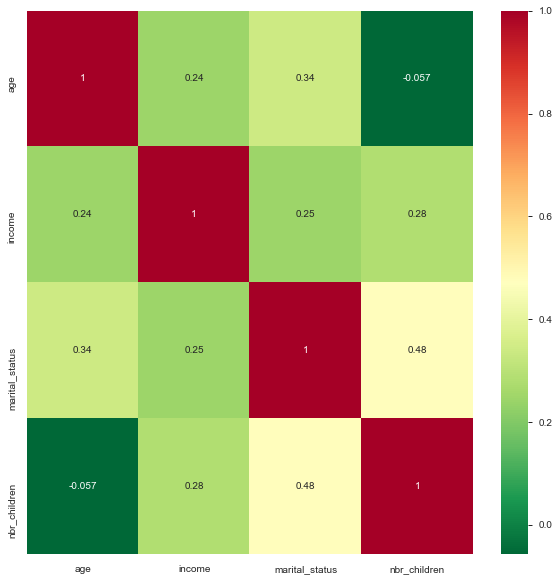

In [21]:
corrmat=df_customer.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df_customer[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [22]:
total = twmCustomer.isnull().sum().sort_values(ascending=False)
percent = (twmCustomer.isnull().sum()/twmCustomer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#NO MISSING DATA???

Total  Percent
state_code           0      0.0
city_name            0      0.0
postal_code          0      0.0
street_name          0      0.0
street_nbr           0      0.0
last_name            0      0.0
first_name           0      0.0
name_prefix          0      0.0
marital_status       0      0.0
gender               0      0.0
nbr_children         0      0.0
years_with_bank      0      0.0
age                  0      0.0
income               0      0.0
cust_id              0      0.0

In [23]:
#city_name might feed on income keep in dataset assign variable 
le = preprocessing.LabelEncoder()
le.fit(twmCustomer['city_name'])
list(le.classes_)
twmCustomer['city_name']=le.transform(twmCustomer['city_name'])

<AxesSubplot:xlabel='income', ylabel='city_name'>

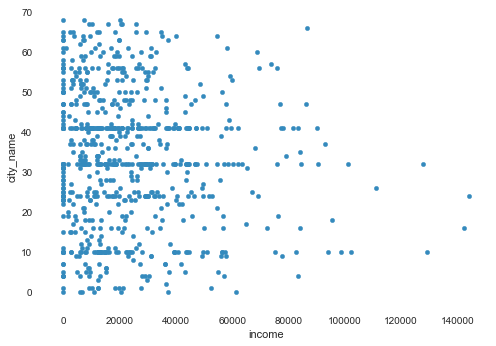

In [24]:
dep='city_name'
var='income'
data=twmCustomer[[dep,var]]
data.plot.scatter(x=var,y=dep)

In [25]:
sorted(list(twmCustomer.columns))

['age',
 'city_name',
 'cust_id',
 'first_name',
 'gender',
 'income',
 'last_name',
 'marital_status',
 'name_prefix',
 'nbr_children',
 'postal_code',
 'state_code',
 'street_name',
 'street_nbr',
 'years_with_bank']

In [26]:
df_customer=twmCustomer[['age','gender','income','marital_status','nbr_children']]

In [27]:
df_customer.dtypes
df_customer

age gender  income  marital_status  nbr_children
0     46     M    26150               2             1
1     71     M     6605               2             0
2     38     F    18548               1             0
3     54     F    47668               1             0
4     59     F    44554               4             2
..   ...    ...     ...             ...           ...
742   36     F    14795               4             1
743   56     M    26387               2             1
744   50     M    61300               2             2
745   37     F    15100               2             0
746   18     F    17875               1             0

[747 rows x 5 columns]

In [28]:
le = preprocessing.LabelEncoder()
le.fit(df_customer['gender'])
list(le.classes_)
df_customer['gender']=le.transform(df_customer['gender'])

In [29]:
X=StandardScaler().fit_transform(df_customer)
customer_std=pd.DataFrame(X,columns=df_customer.columns)

In [30]:
pca=PCA(n_components=2)
principleComponents=pca.fit_transform(X)
principleComponents.shape


(747, 2)

In [73]:
trying=df_customer[['age','income']]

<AxesSubplot:xlabel='gender', ylabel='income'>

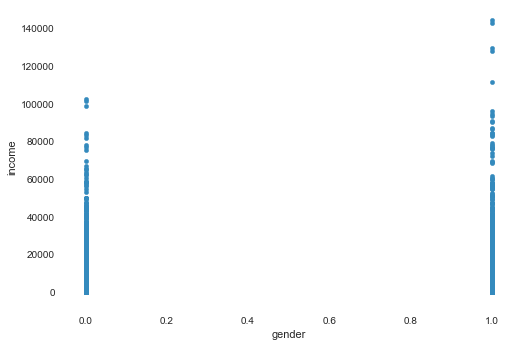

In [32]:
dep='income'
var='gender'
data=df_customer[[dep,var]]
data.plot.scatter(x=var,y=dep)

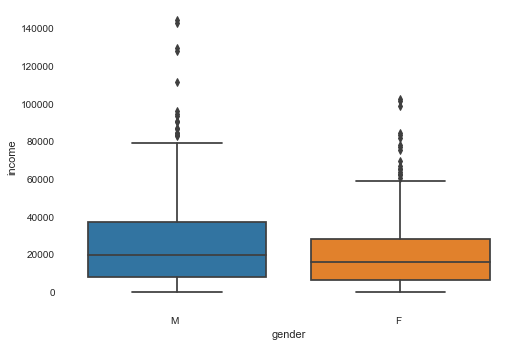

In [33]:
sns.boxplot(y='income', x='gender', data=twmCustomer )
plt.show()

In [34]:
from statannot import add_stat_annotation



In [35]:
t, p = stats.ttest_ind(m,f)

NameError: name 'm' is not defined

In [36]:
p

NameError: name 'p' is not defined

In [37]:
m


NameError: name 'm' is not defined

In [155]:
df_customer

age  gender  income  marital_status  nbr_children
0     46       1   26150               2             1
1     71       1    6605               2             0
2     38       0   18548               1             0
3     54       0   47668               1             0
4     59       0   44554               4             2
..   ...     ...     ...             ...           ...
742   36       0   14795               4             1
743   56       1   26387               2             1
744   50       1   61300               2             2
745   37       0   15100               2             0
746   18       0   17875               1             0

[747 rows x 5 columns]

In [38]:
w = pca.components_
#w is the proportion of all the components that are responsible 

In [39]:
w

array([[ 0.36802447,  0.09839757,  0.49025624,  0.60183621,  0.50231255],
       [-0.57252291, -0.52080194, -0.24463641,  0.1675299 ,  0.55952624]])

In [40]:
pca.explained_variance_ratio_

array([0.36148299, 0.21372791])

In [41]:
pca_customer=PCA(n_components=5)
pca_customer.fit(customer_std)

PCA(n_components=5)

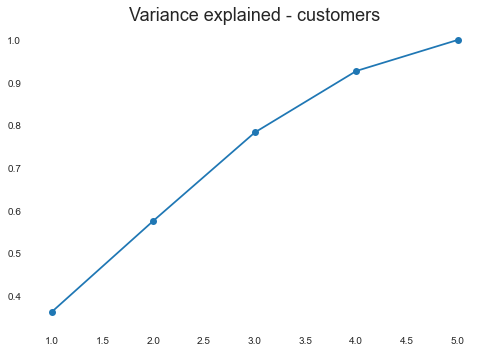

In [42]:
var_exp_customer = np.cumsum(pca_customer.explained_variance_/np.sum(pca_customer.explained_variance_))

# Plots the elbow plot for the wine pca
plt.plot(range(1,6), var_exp_customer, marker='o')
plt.title("Variance explained - customers", fontsize=18);

In [43]:
pca_customer=PCA(n_components=3)
pca_customer.fit(customer_std)

PCA(n_components=3)

In [75]:
trying

age  income
0     46   26150
1     71    6605
2     38   18548
3     54   47668
4     59   44554
..   ...     ...
742   36   14795
743   56   26387
744   50   61300
745   37   15100
746   18   17875

[747 rows x 2 columns]

Text(0.5, 1.0, 'Income vs Age of Customer Demographics')

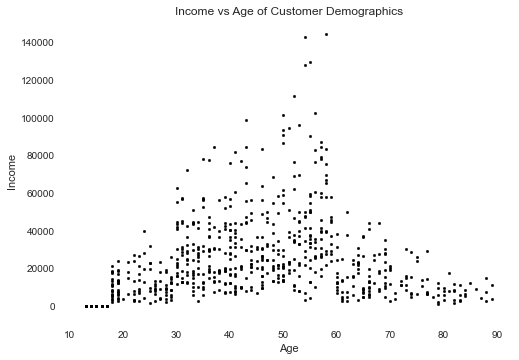

In [83]:
PCA_components = pd.DataFrame(principleComponents)
PCA_components
f1 = trying['age'].values
f2 = trying['income'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age of Customer Demographics')

In [84]:
np.max(X)

144157

In [85]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [86]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[129801.  44279.]
 [ 32458. 125057.]]


In [87]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

KeyboardInterrupt: 

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
import animation
## set larger 'interval' if the speed is too fast
ani.options(interval = 1)


In [154]:
pca_customer

PCA(n_components=3)

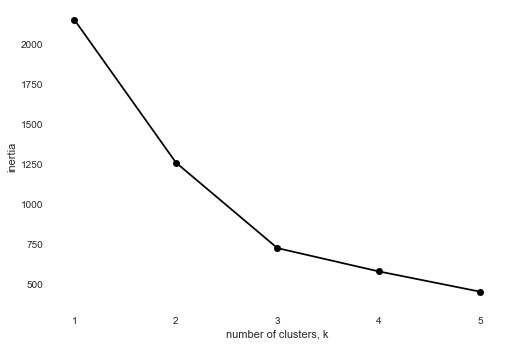

In [88]:
ks = range(1, 6)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [89]:
#go with three clusters
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(PCA_components)
pred = kmeans.predict(PCA_components)

In [90]:
#iterations will randomly chose points and calculate distances
#it will randomly choose three random data points, 
#so make sure you force it to chose the data points at least 20 different times 

In [91]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=2000,
            random_state=0,)

In [92]:
y_km=km.fit_predict(PCA_components)

In [93]:
y_km

array([0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0,
       0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2,

In [94]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2: 'b'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in y_km]


Text(0.5, 1.0, 'Kmeans=3')

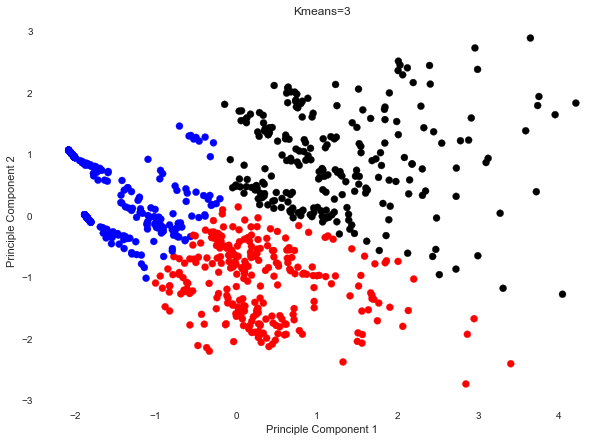

In [95]:
plt.figure(figsize=(10, 7))  
plt.scatter(PCA_components[0], PCA_components[1], c=label_color)

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Kmeans=3')

In [96]:
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10000,
            random_state=0,)

In [100]:
y_km=km.fit_predict(PCA_components)

In [98]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                  
                   }

label_color = [LABEL_COLOR_MAP[l] for l in y_km]


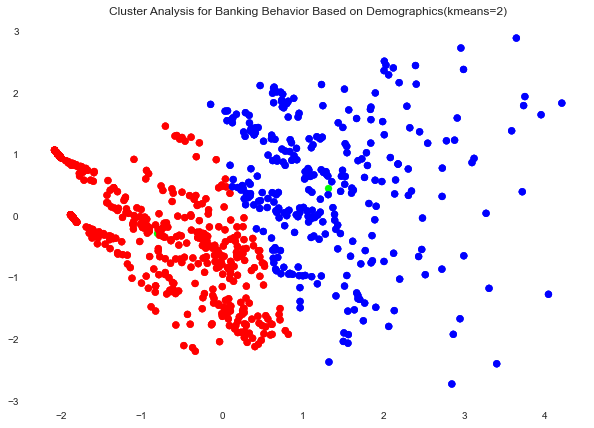

In [101]:
plt.figure(figsize=(10, 7))  
plt.scatter(PCA_components[0], PCA_components[1], c=label_color)

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='lime')
plt.title('Cluster Analysis for Banking Behavior Based on Demographics(kmeans=2)')
plt.scatter(PCA_components[0], PCA_components[1], c=label_color)


In [102]:
q = pca.components_
#w is the proportion of all the components that are responsible 
q

array([[ 0.36802447,  0.09839757,  0.49025624,  0.60183621,  0.50231255],
       [-0.57252291, -0.52080194, -0.24463641,  0.1675299 ,  0.55952624]])

In [103]:
import plotly.graph_objects as go

categories = ['Age',
              'gender', 'income','marital_status','nbr_children']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=q[0],
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=q[1],
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, .75]
    )),
  showlegend=True
)

fig.show()

Text(0, 0.5, 'PCA 2')

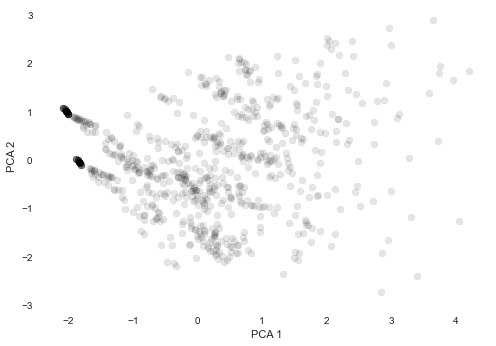

In [104]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## 2)based on their banking behavior. We can take following things into consideration as banking behavior:
###     a)do they have savings account? How much do they save?
###     b)do they have credit account? How much do they live in debt?
###     c)are they making lot of small transactions or few huge ones?


#### twmAccounts
Useful to tie accounts to cust_id, ending balance (acct_nbr, cust_id, starting_balance, ending_balance)
1409x8
#### twmCreditAcc
Shows the credit accnt given in Accounts, the cust_id, credit_limit, starting_balance, ending_balance 
#### twmSavingsAcct

#### twmTrans

In [105]:
 twmCreditAcc.sort_values(by='ending_balance')

cust_id          acct_nbr  credit_limit  credit_rating account_active  \
141  1363169  4561143213631690          3000              0             Y    
89   1363133  4561143213631330          3000              0             Y    
165  1363493  4561143213634930          1500              0             Y    
169  1363146  4561143213631460          3000              0             Y    
409  1362920  4561143213629200          1000              0             Y    
..       ...               ...           ...            ...            ...   
397  1363492  4561143213634920          7100              0             Y    
18   1362832  4561143213628320          8500              0             Y    
424  1362960  4561143213629600          8600              0             Y    
466  1362569  4561143213625690          9200              0             Y    
305  1362562  4561143213625620          9500              0             Y    

    acct_start_date acct_end_date  starting_balance  ending_balance  
141      12.11.1991           NaN           1729.57             0.0  
89       20.10.1989           NaN           1656.70             0.0  
165       10.7.1995           NaN              0.00             0.0  
169        8.2.1991           NaN           2782.38             0.0  
409      13.12.1995           NaN              0.00             0.0  
..              ...           ...               ...             ...  
397      31.12.1991           NaN           4128.58          6869.0  
18       18.11.1995           NaN              0.00          8500.0  
424       24.7.1986           NaN           5951.37          8600.0  
466       6.12.1995           NaN              0.00          9200.0  
305       4.11.1995           NaN              0.00          9500.0  

[468 rows x 9 columns]

In [106]:
twmCreditTran.sort_values(by='tran_date')

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
13953  1362784        1   1008.55         972.56         35.99     -1583.15   
3858   1362694        1    518.98         502.70         16.28      -653.53   
18886  1362549        1    828.67         814.33         14.34      -203.71   
11738  1362610        1    -94.36         -94.36          0.00      -815.21   
10817  1363056        1   -244.62        -244.62          0.00      -548.09   
...        ...      ...       ...            ...           ...          ...   
14830  1363474       19    -29.90         -29.90          0.00      -500.73   
6589   1363204       11   -289.63        -289.63          0.00     -1168.00   
16680  1362980       35    -87.81         -87.81          0.00      -257.83   
918    1363196       74   -200.00        -200.00          0.00      -367.35   
703    1362631       35   -615.77        -615.77          0.00      -615.77   

      tran_date     tran_time channel tran_code  
13953  1.1.1995                    M       PM    
3858   1.1.1995        101508      C       PM    
18886  1.1.1995                    M       PM    
11738  1.1.1995        152738      E       CG    
10817  1.1.1995        181050      E       CG    
...         ...           ...     ...       ...  
14830  9.9.1995        162832      E       CG    
6589   9.9.1995        191136      E       CG    
16680  9.9.1995        185521      E       CG    
918    9.9.1995        184912      A       CA    
703    9.9.1995         95955      E       CG    

[20167 rows x 10 columns]

In [107]:
twmSavingsAcct['total_saved']=twmSavingsAcct['ending_balance']-twmSavingsAcct['starting_balance']

In [108]:
twmSavingsAcct.sort_values(by='total_saved', ascending=False)

cust_id  acct_nbr  minimum_balance acct_type account_active  \
272  1362766  13627663              100      BS               Y    
52   1363337  13633373              100      BS               Y    
401  1363366  13633663              100      BS               Y    
79   1362969  13629693              100      BS               Y    
367  1362594  13625943              500      MM               Y    
..       ...       ...              ...       ...            ...   
56   1362725  13627253              500      MM               Y    
218  1362894  13628943              500      MM               Y    
170  1363264  13632643              100      BS               Y    
197  1363182  13631823              500      MM               Y    
188  1363018  13630183              500      MM               Y    

    acct_start_date acct_end_date  starting_balance  ending_balance  \
272      29.11.1990           NaN          11352.93        22432.78   
52        12.6.1994           NaN            531.48         7766.05   
401      23.11.1995           NaN            465.29         7471.81   
79        15.3.1992           NaN           1063.49         5792.74   
367       29.6.1994           NaN           1985.18         6619.84   
..              ...           ...               ...             ...   
56        30.1.1995           NaN          17303.42        16095.50   
218        3.2.1990           NaN           2013.26          360.28   
170       24.3.1994           NaN           2095.37          369.44   
197      28.11.1995           NaN           3136.49          753.69   
188      28.10.1994           NaN          11793.93         9387.66   

     total_saved  
272     11079.85  
52       7234.57  
401      7006.52  
79       4729.25  
367      4634.66  
..           ...  
56      -1207.92  
218     -1652.98  
170     -1725.93  
197     -2382.80  
188     -2406.27  

[421 rows x 10 columns]

In [109]:
twmAccounts

acct_nbr  cust_id acct_type account_active acct_start_date  \
0             13628063  1362806      SV               Y       10.12.1995   
1     4561143213627090  1362709      CC               Y        15.3.1993   
2     4561143213628360  1362836      CC               Y        18.3.1992   
3             13633112  1363311      CK               Y         6.7.1995   
4     4561143213633610  1363361      CC               Y        17.6.1994   
...                ...      ...       ...            ...             ...   
1404  4561143213625560  1362556      CC               N        20.1.1992   
1405  4561143213626240  1362624      CC               Y       29.11.1990   
1406  4561143213628750  1362875      CC               Y        24.2.1989   
1407          13626543  1362654      SV               Y       17.10.1992   
1408          13627032  1362703      CK               Y        18.9.1994   

     acct_end_date  starting_balance  ending_balance  
0              NaN           1430.22          284.58  
1              NaN            266.34          496.15  
2              NaN             55.90         1000.00  
3              NaN          11017.13          968.46  
4              NaN            849.37          462.28  
...            ...               ...             ...  
1404     19.8.1995           1433.94           20.00  
1405           NaN            632.75         1400.00  
1406           NaN           2810.91         3000.00  
1407           NaN            784.53          622.46  
1408           NaN           3649.18          107.33  

[1409 rows x 8 columns]

In [110]:

#group by customer id 
# we wont need acct_end_date or start date
#make active numerical 
#acct_type numerical 
dfAccounts=twmAccounts[['acct_nbr', 'cust_id','acct_type', 'account_active','starting_balance','ending_balance']]
dfAccounts

acct_nbr  cust_id acct_type account_active  starting_balance  \
0             13628063  1362806      SV               Y            1430.22   
1     4561143213627090  1362709      CC               Y             266.34   
2     4561143213628360  1362836      CC               Y              55.90   
3             13633112  1363311      CK               Y           11017.13   
4     4561143213633610  1363361      CC               Y             849.37   
...                ...      ...       ...            ...               ...   
1404  4561143213625560  1362556      CC               N            1433.94   
1405  4561143213626240  1362624      CC               Y             632.75   
1406  4561143213628750  1362875      CC               Y            2810.91   
1407          13626543  1362654      SV               Y             784.53   
1408          13627032  1362703      CK               Y            3649.18   

      ending_balance  
0             284.58  
1             496.15  
2            1000.00  
3             968.46  
4             462.28  
...              ...  
1404           20.00  
1405         1400.00  
1406         3000.00  
1407          622.46  
1408          107.33  

[1409 rows x 6 columns]

In [111]:
# totla missing data
total = dfAccounts.isnull().sum().sort_values(ascending=False)
percent = (dfAccounts.isnull().sum()/dfAccounts.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#no missing data 

Total  Percent
ending_balance        0      0.0
starting_balance      0      0.0
account_active        0      0.0
acct_type             0      0.0
cust_id               0      0.0
acct_nbr              0      0.0

In [112]:
twmAccounts['acct_nbr'].isnull().values.any()

False

In [113]:
twmAccounts['starting_balance'].isnull().values.any()

False

In [114]:
twmAccounts['cust_id'].isnull().values.any()

False

In [115]:
twmAccounts['ending_balance'].isnull().values.any()

False

In [116]:
twmAccounts['account_active'].isnull().values.any()

False

In [117]:
twmAccounts['acct_type'].isnull().values.any()

False

In [118]:
#no nans
#now convert all numericals 
dfAccounts.dtypes

acct_nbr              int64
cust_id               int64
acct_type            object
account_active       object
starting_balance    float64
ending_balance      float64
dtype: object

In [119]:
le.fit(dfAccounts['acct_type'])
list(le.classes_)
dfAccounts['acct_type']=le.transform(dfAccounts['acct_type']) 
le.fit(dfAccounts['account_active'])
list(le.classes_)
dfAccounts['account_active']=le.transform(dfAccounts['account_active']) 

In [120]:
dfAccounts

acct_nbr  cust_id  acct_type  account_active  starting_balance  \
0             13628063  1362806          2               1           1430.22   
1     4561143213627090  1362709          0               1            266.34   
2     4561143213628360  1362836          0               1             55.90   
3             13633112  1363311          1               1          11017.13   
4     4561143213633610  1363361          0               1            849.37   
...                ...      ...        ...             ...               ...   
1404  4561143213625560  1362556          0               0           1433.94   
1405  4561143213626240  1362624          0               1            632.75   
1406  4561143213628750  1362875          0               1           2810.91   
1407          13626543  1362654          2               1            784.53   
1408          13627032  1362703          1               1           3649.18   

      ending_balance  
0             284.58  
1             496.15  
2            1000.00  
3             968.46  
4             462.28  
...              ...  
1404           20.00  
1405         1400.00  
1406         3000.00  
1407          622.46  
1408          107.33  

[1409 rows x 6 columns]

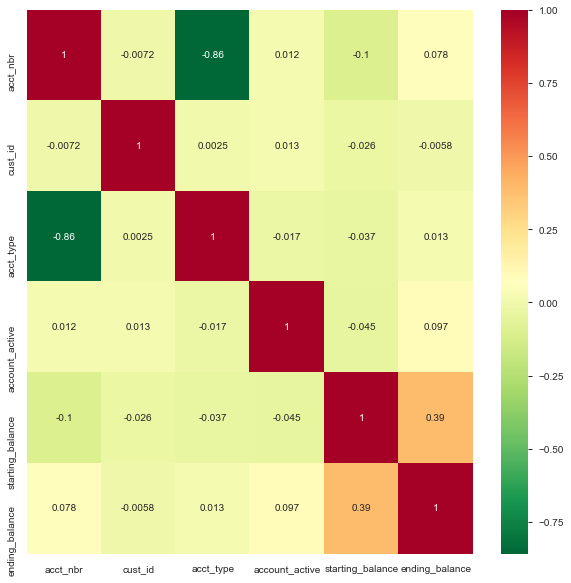

In [121]:
corrmat=dfAccounts.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(dfAccounts[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [122]:
 twmCreditAcc.sort_values(by='credit_rating', ascending=False)
#we dont want accnt start and accnt end 
dfCreditOver=twmCreditAcc[['cust_id','acct_nbr','credit_limit','credit_rating','account_active','starting_balance','ending_balance']]
dfCreditOver


cust_id          acct_nbr  credit_limit  credit_rating account_active  \
0    1363160  4561143213631600          1000              0             Y    
1    1362487  4561143213624870          3000              0             Y    
2    1362548  4561143213625480          6700              0             Y    
3    1362752  4561143213627520          2400              0             N    
4    1363017  4561143213630170          1000              0             Y    
..       ...               ...           ...            ...            ...   
463  1363364  4561143213633640          3000              0             N    
464  1363467  4561143213634670          1500              0             Y    
465  1363263  4561143213632630          3000              0             Y    
466  1362569  4561143213625690          9200              0             Y    
467  1363303  4561143213633030          1000              0             Y    

     starting_balance  ending_balance  
0              657.46          286.69  
1                0.00         1548.23  
2             6965.25           68.68  
3             2302.14            0.00  
4                0.00         1000.00  
..                ...             ...  
463           1783.86         1785.97  
464           1193.89         1500.00  
465              0.00         1218.94  
466              0.00         9200.00  
467              0.00         1000.00  

[468 rows x 7 columns]

In [123]:
# totla missing data
total = dfCreditOver.isnull().sum().sort_values(ascending=False)
percent = (dfCreditOver.isnull().sum()/dfCreditOver.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#no missing data 

Total  Percent
ending_balance        0      0.0
starting_balance      0      0.0
account_active        0      0.0
credit_rating         0      0.0
credit_limit          0      0.0
acct_nbr              0      0.0
cust_id               0      0.0

In [124]:
for i in dfCreditOver.columns:
    print(dfCreditOver[i].isnull().values.any())
#no nans

False
False
False
False
False
False
False


In [125]:
dfCreditOver.dtypes

cust_id               int64
acct_nbr              int64
credit_limit          int64
credit_rating         int64
account_active       object
starting_balance    float64
ending_balance      float64
dtype: object

In [126]:
#convert ccount_active 
le.fit(dfCreditOver['account_active'])
list(le.classes_)
dfCreditOver['account_active']=le.transform(dfCreditOver['account_active']) 

In [127]:
dfCreditOver.dtypes

cust_id               int64
acct_nbr              int64
credit_limit          int64
credit_rating         int64
account_active        int64
starting_balance    float64
ending_balance      float64
dtype: object

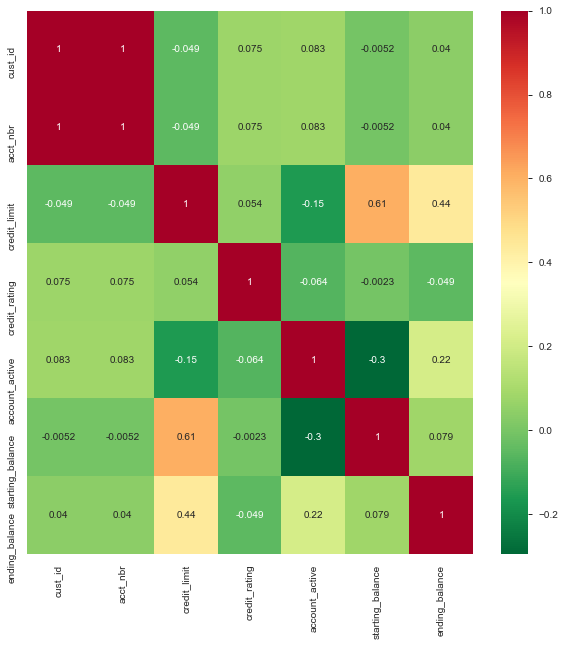

In [128]:
corrmat=dfCreditOver.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(dfCreditOver[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [129]:

twmSavingsAcct['total_saved']=twmSavingsAcct['ending_balance']-twmSavingsAcct['starting_balance']
twmSavingsAcct


cust_id  acct_nbr  minimum_balance acct_type account_active  \
0    1363160  13631603              100      BS               Y    
1    1362487  13624873              500      MM               N    
2    1362548  13625483              100      BS               Y    
3    1362752  13627523              100      BS               Y    
4    1363017  13630173              100      BS               N    
..       ...       ...              ...       ...            ...   
416  1363141  13631413              100      BS               Y    
417  1363038  13630383              100      BS               Y    
418  1362529  13625293              100      BS               Y    
419  1362895  13628953              100      BS               Y    
420  1362855  13628553              100      BS               Y    

    acct_start_date acct_end_date  starting_balance  ending_balance  \
0          9.5.1988           NaN            113.04          122.54   
1         27.6.1994     25.8.1995            651.73           12.89   
2        11.11.1986           NaN            250.24          254.02   
3         20.2.1995           NaN            600.26          609.33   
4         27.4.1994    31.10.1995           2011.02         2901.35   
..              ...           ...               ...             ...   
416      11.11.1994           NaN            177.33          528.57   
417       20.2.1995           NaN            333.53          508.26   
418      15.11.1992           NaN            662.06          873.14   
419       27.6.1995           NaN            169.96           96.25   
420       21.3.1995           NaN            167.71          161.04   

     total_saved  
0           9.50  
1        -638.84  
2           3.78  
3           9.07  
4         890.33  
..           ...  
416       351.24  
417       174.73  
418       211.08  
419       -73.71  
420        -6.67  

[421 rows x 10 columns]

In [130]:
dfSavings=twmSavingsAcct[['cust_id','acct_nbr','minimum_balance','acct_type','account_active','starting_balance','ending_balance','total_saved']]
dfSavings

cust_id  acct_nbr  minimum_balance acct_type account_active  \
0    1363160  13631603              100      BS               Y    
1    1362487  13624873              500      MM               N    
2    1362548  13625483              100      BS               Y    
3    1362752  13627523              100      BS               Y    
4    1363017  13630173              100      BS               N    
..       ...       ...              ...       ...            ...   
416  1363141  13631413              100      BS               Y    
417  1363038  13630383              100      BS               Y    
418  1362529  13625293              100      BS               Y    
419  1362895  13628953              100      BS               Y    
420  1362855  13628553              100      BS               Y    

     starting_balance  ending_balance  total_saved  
0              113.04          122.54         9.50  
1              651.73           12.89      -638.84  
2              250.24          254.02         3.78  
3              600.26          609.33         9.07  
4             2011.02         2901.35       890.33  
..                ...             ...          ...  
416            177.33          528.57       351.24  
417            333.53          508.26       174.73  
418            662.06          873.14       211.08  
419            169.96           96.25       -73.71  
420            167.71          161.04        -6.67  

[421 rows x 8 columns]

In [131]:
total = dfSavings.isnull().sum().sort_values(ascending=False)
percent = (dfSavings.isnull().sum()/dfSavings.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#no missing data 

Total  Percent
total_saved           0      0.0
ending_balance        0      0.0
starting_balance      0      0.0
account_active        0      0.0
acct_type             0      0.0
minimum_balance       0      0.0
acct_nbr              0      0.0
cust_id               0      0.0

In [132]:
for i in dfSavings.columns:
    print(dfSavings[i].isnull().values.any())
#no nans

False
False
False
False
False
False
False
False


In [133]:
dfSavings.dtypes

cust_id               int64
acct_nbr              int64
minimum_balance       int64
acct_type            object
account_active       object
starting_balance    float64
ending_balance      float64
total_saved         float64
dtype: object

In [134]:
le.fit(dfSavings['acct_type'])
list(le.classes_)
dfSavings['acct_type']=le.transform(dfSavings['acct_type']) 

In [135]:
le.fit(dfSavings['account_active'])
list(le.classes_)
dfSavings['account_active']=le.transform(dfSavings['account_active']) 

In [136]:
dfSavings.dtypes

cust_id               int64
acct_nbr              int64
minimum_balance       int64
acct_type             int64
account_active        int64
starting_balance    float64
ending_balance      float64
total_saved         float64
dtype: object

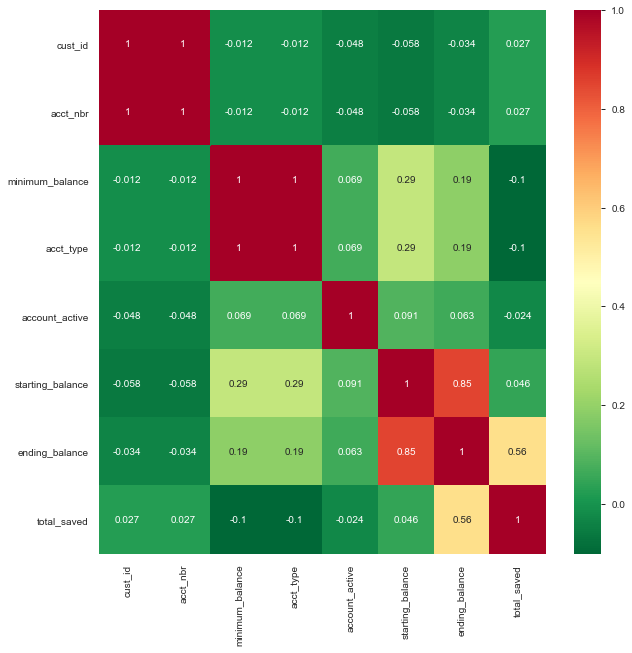

In [137]:
corrmat=dfSavings.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(dfSavings[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [138]:
twmTrans

tran_id          acct_nbr  tran_amt  principal_amt  interest_amt  \
0           27          13625623      0.00           0.00           0.0   
1           97          13628392      0.00           0.00           0.0   
2           21          13630842    -97.57         -97.57           0.0   
3           44          13631412     -0.15          -0.15           0.0   
4           31          13625722      0.00           0.00           0.0   
...        ...               ...       ...            ...           ...   
77575       77          13631752    -95.71         -95.71           0.0   
77576       94          13626772    -93.90         -93.90           0.0   
77577       42          13625262    -10.35         -10.35           0.0   
77578       98          13627052   -423.80        -423.80           0.0   
77579       57  4561143213632570      0.00           0.00           0.0   

       new_balance   tran_date  tran_time channel tran_code  
0          3753.34  21.10.1995     121656      A       IQ    
1           254.49    5.2.1995     153053      V       IQ    
2          3819.56   23.7.1995          0      P       WD    
3           224.05   30.1.1995          0              FK    
4           240.55   25.1.1995     204521      B       IQ    
...            ...         ...        ...     ...       ...  
77575        95.71   14.2.1995     161001      A       TR    
77576       824.36   11.3.1995          0      P       WD    
77577        10.36   26.8.1995          0      P       WD    
77578       162.28   13.6.1995     110209      E       WD    
77579     -2420.91  18.10.1995     104027      A       IQ    

[77580 rows x 10 columns]

In [139]:
dfTrans=twmTrans[['acct_nbr','tran_amt','interest_amt','new_balance']]

In [140]:
dfTrans

acct_nbr  tran_amt  interest_amt  new_balance
0              13625623      0.00           0.0      3753.34
1              13628392      0.00           0.0       254.49
2              13630842    -97.57           0.0      3819.56
3              13631412     -0.15           0.0       224.05
4              13625722      0.00           0.0       240.55
...                 ...       ...           ...          ...
77575          13631752    -95.71           0.0        95.71
77576          13626772    -93.90           0.0       824.36
77577          13625262    -10.35           0.0        10.36
77578          13627052   -423.80           0.0       162.28
77579  4561143213632570      0.00           0.0     -2420.91

[77580 rows x 4 columns]

In [141]:
total = dfTrans.isnull().sum().sort_values(ascending=False)
percent = (dfTrans.isnull().sum()/dfTrans.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#no missing data 

Total  Percent
new_balance       0      0.0
interest_amt      0      0.0
tran_amt          0      0.0
acct_nbr          0      0.0

In [142]:
for i in dfTrans.columns:
    print(dfTrans[i].isnull().values.any())
#no nans

False
False
False
False


In [143]:
dfTrans.dtypes

acct_nbr          int64
tran_amt        float64
interest_amt    float64
new_balance     float64
dtype: object

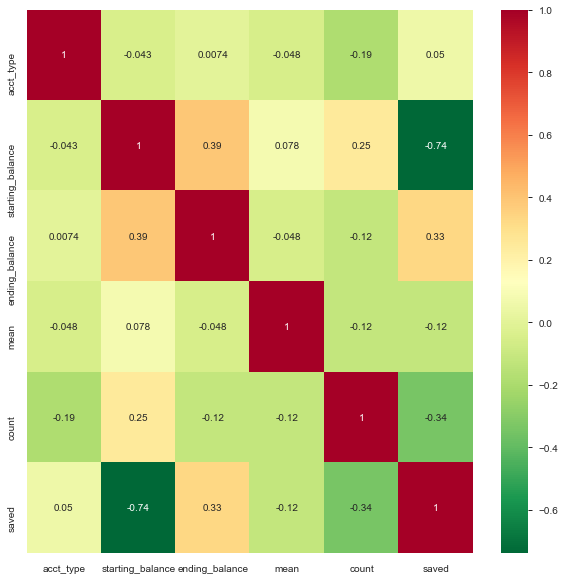

In [153]:
corrmat=dfwithTransactions.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(dfwithTransactions[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [145]:
#we need to count transactions and mean and group by acct number and tag it onto the dfAccounts
dfMeanandCount=dfTrans.groupby('acct_nbr')['tran_amt'].agg(['mean','count'])#
n_transactions=dfMeanandCount.reset_index()
dfMeanandCount

mean  count
acct_nbr                           
13624802           -2.474646     99
13624803           18.550769     26
13624842          -25.435758     99
13624843           58.474545     33
13624852           -1.659495     99
...                      ...    ...
4561143213634830    0.334805     77
4561143213634840   12.080513     39
4561143213634850  139.239565     23
4561143213634860    0.000000     38
4561143213634920  -61.280690     29

[1398 rows x 2 columns]

In [146]:
dfAccounts

acct_nbr  cust_id  acct_type  account_active  starting_balance  \
0             13628063  1362806          2               1           1430.22   
1     4561143213627090  1362709          0               1            266.34   
2     4561143213628360  1362836          0               1             55.90   
3             13633112  1363311          1               1          11017.13   
4     4561143213633610  1363361          0               1            849.37   
...                ...      ...        ...             ...               ...   
1404  4561143213625560  1362556          0               0           1433.94   
1405  4561143213626240  1362624          0               1            632.75   
1406  4561143213628750  1362875          0               1           2810.91   
1407          13626543  1362654          2               1            784.53   
1408          13627032  1362703          1               1           3649.18   

      ending_balance  
0             284.58  
1             496.15  
2            1000.00  
3             968.46  
4             462.28  
...              ...  
1404           20.00  
1405         1400.00  
1406         3000.00  
1407          622.46  
1408          107.33  

[1409 rows x 6 columns]

In [147]:
dfwithTransactions=pd.merge(dfAccounts, n_transactions, how='inner', on='acct_nbr',
         left_index=False, right_index=False, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [148]:
dfwithTransactions=dfwithTransactions[['acct_type','starting_balance','ending_balance','mean','count']]

In [149]:
#for every cc if the cc end balance is positive it means that there is debt, 
#where as negative balance for checking means there is debt so you have to
#assign a negative to all accounts 0 



In [150]:
#use normalize dont use standardize!

In [151]:
#optics like dbscan

In [152]:
dfwithTransactions['saved']=dfwithTransactions['ending_balance']-dfwithTransactions['starting_balance']
dfwithTransactions

acct_type  starting_balance  ending_balance        mean  count     saved
0             2           1430.22          284.58  -28.641000     40  -1145.64
1             0            266.34          496.15   -4.110182     55    229.81
2             0             55.90         1000.00  -19.863659     41    944.10
3             1          11017.13          968.46 -101.501717     99 -10048.67
4             0            849.37          462.28    9.280233     43   -387.09
...         ...               ...             ...         ...    ...       ...
1392          0           1433.94           20.00   38.396190     42  -1413.94
1393          0            632.75         1400.00  -14.251837     49    767.25
1394          0           2810.91         3000.00    5.022105     38    189.09
1395          2            784.53          622.46   -7.717619     21   -162.07
1396          1           3649.18          107.33  -35.776263     99  -3541.85

[1397 rows x 6 columns]

In [398]:
X=StandardScaler().fit_transform(dfwithTransactions)
trans_std=pd.DataFrame(X,columns=dfwithTransactions.columns)
pca=PCA(n_components=2)
principleComponents=pca.fit_transform(X)
principleComponents.shape


(1397, 2)

In [399]:
pca_trans=PCA(n_components=5)
pca_trans.fit(trans_std)

PCA(n_components=5)

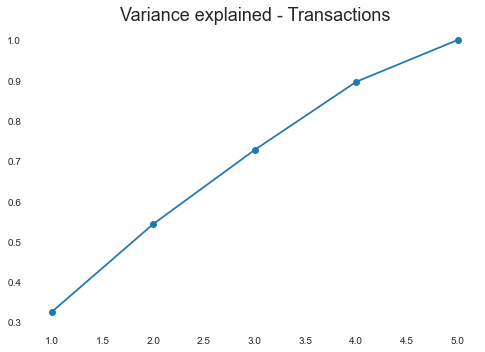

In [400]:
var_exp_customer = np.cumsum(pca_trans.explained_variance_/np.sum(pca_trans.explained_variance_))

# Plots the elbow plot for the wine pca
plt.plot(range(1,6), var_exp_customer, marker='o')
plt.title("Variance explained - Transactions", fontsize=18);

In [401]:
PCA_components = pd.DataFrame(principleComponents)
PCA_components

0         1
0    -0.167820 -0.146528
1    -0.350367 -0.633746
2    -0.815790 -0.240921
3     6.110101  0.763050
4    -0.143702 -0.494252
...        ...       ...
1392  0.338014 -0.690380
1393 -0.507388  0.010788
1394  0.115224  1.333124
1395 -0.884643  0.130932
1396  2.103899 -0.631143

[1397 rows x 2 columns]

Text(0, 0.5, 'PCA 2')

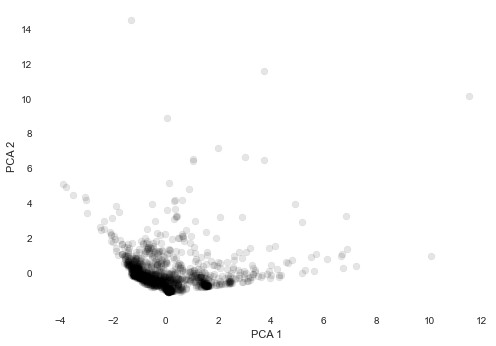

In [402]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

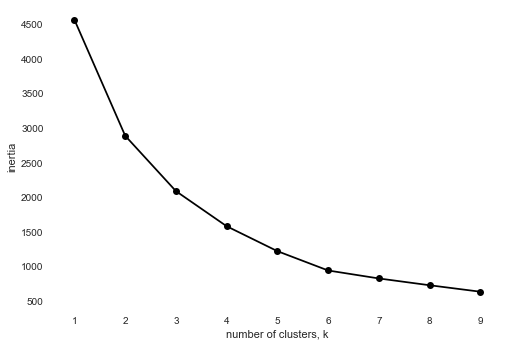

In [403]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [428]:
#go with three clusters
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(PCA_components)
pred = kmeans.predict(PCA_components)

In [429]:
frame = pd.DataFrame(PCA_components)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1092
1     268
2      37
Name: cluster, dtype: int64

In [422]:
y_km=km.fit_predict(PCA_components)

In [436]:
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=2000,
            random_state=0,)

In [437]:
y_km=km.fit_predict(PCA_components)

In [438]:
print(y_km)

[0 0 0 ... 0 0 1]


In [439]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                
                   }

label_color = [LABEL_COLOR_MAP[l] for l in y_km]

Text(0.5, 1.0, 'Cluster Analysis for Banking Behavior Based on Transactions(kmeans=2)')

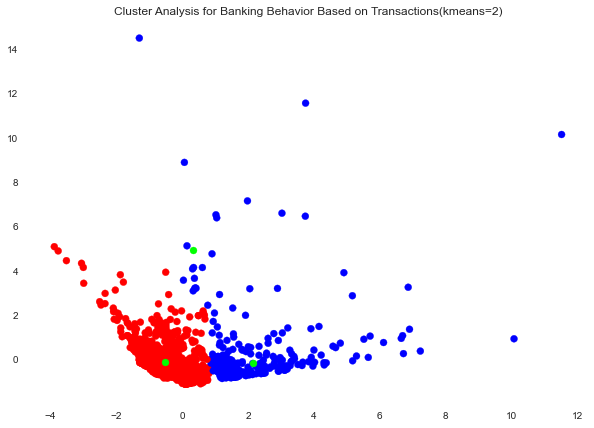

In [440]:
plt.figure(figsize=(10, 7))  
plt.scatter(PCA_components[0], PCA_components[1], c=label_color)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='lime')
plt.title('Cluster Analysis for Banking Behavior Based on Transactions(kmeans=2)')



In [415]:
exp=dfwithTransactions.sort_values(by='mean', ascending=False)
exp

acct_type  starting_balance  ending_balance         mean  count    saved
8             0           8649.37             0.0  8735.140000      1 -8649.37
1152          0           3866.70             0.0  3905.040000      1 -3866.70
1148          0           2782.38             0.0  2814.610000      1 -2782.38
917           0           1729.57             0.0  1749.600000      1 -1729.57
788           0           1656.70             0.0  1675.890000      1 -1656.70
...         ...               ...             ...          ...    ...      ...
88            0              0.00          2700.0  -225.000000     12  2700.00
23            0              0.00          6800.0  -261.538462     26  6800.00
897           0              0.00          8500.0  -293.103448     29  8500.00
639           0              0.00          9200.0  -328.571429     28  9200.00
119           0              0.00          9500.0  -351.851852     27  9500.00

[1397 rows x 6 columns]

In [430]:
w = pca.components_
#w is the proportion of all the components that are responsible 
w


array([[-0.14743642,  0.61233461, -0.03082678,  0.08547024,  0.41370481,
        -0.65107734],
       [ 0.14446797,  0.43109481,  0.83604321, -0.00628799, -0.25586819,
         0.16973493]])

In [435]:
import plotly.graph_objects as go

categories = ['acct_type','starting_balance',
              'ending_balance', 'mean','count','saved']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=w[0],
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=w[1],
      theta=categories,
      fill='toself',
      name='Cluster 2'
))



fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )),
  showlegend=True
)

fig.show()


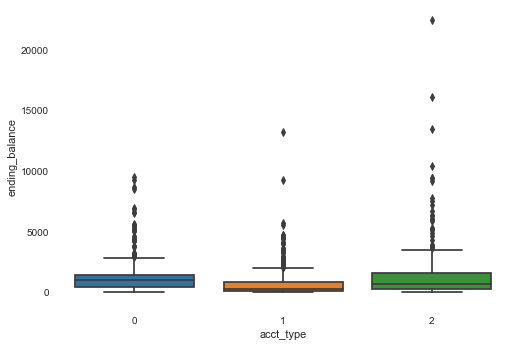

In [443]:

sns.boxplot(y='ending_balance', x='acct_type', data=dfwithTransactions )
plt.show()

In [ ]:
import numpy as np

def assignPointsToCentroids(centroids, points):
    '''Determine the centroid to which each point is nearest, and
        store this as an int from 0 to K-1 in classifications.
    '''
    M = points.shape[0]
    K = centroids.shape[0]
    classifications = np.zeros((M,), dtype=np.int)

    for i in range(M):
        smallestDistance = 0
        for k in range(K):
            distance = np.linalg.norm(points[i,:] - centroids[k,:])
            if k == 0:
                smallestDistance = distance
                classifications[i] = k
            elif distance < smallestDistance:
                smallestDistance = distance
                classifications[i] = k
    return classifications

In [ ]:
def recalcCentroids(centroids, points, classifications):
    '''Recalculate centroid locations for each cluster.'''
    K = centroids.shape[0]
    N = points.shape[1]
    M = points.shape[0]

    newCentroids = np.zeros((K, N))
    for k in range(K):
        if sum(classifications == k) > 0:
            newCentroids[k,:] = (
                np.sum(points[classifications == k,:], axis=0)
                / sum(classifications == k))
        else:
            newCentroids[k,:] = centroids[k,:]
    return newCentroids

In [ ]:
class KMeansND:
    '''KMeansND(initialCentroids, points)

    PARAMETERS:

    initialCentroids: K x N array of K initial centroids with N
        features/coordinates.

    points: M x N array of M points with N features/coordinates.

    METHODS:

    (centroids, classifications, iterations) = getCentroids()
        Perform K-means clustering. Return a tuple containing the
        array of centroid coordinates, an M x 1 array of point
        classifications, and number of iterations required.

    getGenerator()
        Return a generator function to step through K-means iterations.
        Each call of the generator returns the current centroids,
        classifications, and iteration, beginning with the initial
        centroids and classifications.
    '''
    def __init__(self, initialCentroids, points):
        if initialCentroids.shape[1] != points.shape[1]:
            raise RuntimeError('Dimension mismatch. Centroids and data points'
                + ' must be described by the same number of features.')
        else:
            self.initialCentroids = initialCentroids
            self.points = points

In [ ]:
def getCentroids(self):
        centroids = np.copy(self.initialCentroids)
        # Initialize lastCentroids to arbitrary value different from centroids
        # to ensure loop executes at least once.
        lastCentroids = centroids + 1
        iteration = 0
        while not np.array_equal(centroids, lastCentroids):
            lastCentroids = np.copy(centroids)
            classifications = assignPointsToCentroids(centroids, self.points)
            centroids = recalcCentroids(centroids, self.points, classifications)
            iteration += 1
        return (centroids, classifications, iteration)

In [ ]:
def _generatorFunc(self):
        centroids = np.copy(self.initialCentroids)
        lastCentroids = centroids + 1
        iteration = 0
        initialIteration = True
        while not np.array_equal(centroids, lastCentroids):
            if initialIteration:
                classifications = assignPointsToCentroids(centroids, self.points)
                initialIteration = False
            else:
                lastCentroids = np.copy(centroids)
                classifications = assignPointsToCentroids(centroids, self.points)
                centroids = recalcCentroids(centroids, self.points, classifications)
                iteration += 1
            yield (centroids, classifications, iteration)

In [ ]:
 def getGeneratorFunc(self):
        return self._generatorFunc

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import colorsys
import sys
from datetime import datetime
from KMeansND import *

In [156]:
twm 

tran_id          acct_nbr  tran_amt  principal_amt  interest_amt  \
0           27          13625623      0.00           0.00           0.0   
1           97          13628392      0.00           0.00           0.0   
2           21          13630842    -97.57         -97.57           0.0   
3           44          13631412     -0.15          -0.15           0.0   
4           31          13625722      0.00           0.00           0.0   
...        ...               ...       ...            ...           ...   
77575       77          13631752    -95.71         -95.71           0.0   
77576       94          13626772    -93.90         -93.90           0.0   
77577       42          13625262    -10.35         -10.35           0.0   
77578       98          13627052   -423.80        -423.80           0.0   
77579       57  4561143213632570      0.00           0.00           0.0   

       new_balance   tran_date  tran_time channel tran_code  
0          3753.34  21.10.1995     121656      A       IQ    
1           254.49    5.2.1995     153053      V       IQ    
2          3819.56   23.7.1995          0      P       WD    
3           224.05   30.1.1995          0              FK    
4           240.55   25.1.1995     204521      B       IQ    
...            ...         ...        ...     ...       ...  
77575        95.71   14.2.1995     161001      A       TR    
77576       824.36   11.3.1995          0      P       WD    
77577        10.36   26.8.1995          0      P       WD    
77578       162.28   13.6.1995     110209      E       WD    
77579     -2420.91  18.10.1995     104027      A       IQ    

[77580 rows x 10 columns]

In [448]:
kmeans = KMeans(n_jobs = 2000, n_clusters = 2, init='k-means++')
kmeans.fit(exp)
pred = kmeans.predict(exp)

In [449]:
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1103
1     294
Name: cluster, dtype: int64

In [450]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [453]:
y_km=km.fit_predict(exp)

plt.figure(figsize=(10, 7))  
plt.scatter(y_km)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='lime')
plt.title('Cluster Analysis for Banking Behavior Based on Transactions(kmeans=2)')

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 720x504 with 0 Axes>

In [454]:
y_km

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [455]:
frame = pd.DataFrame(exp)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1103
1     294
Name: cluster, dtype: int64